In [5]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Pre-processing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Analysis Libraries
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, classification_report
from scipy.stats import zscore

In [9]:
# Importing Data
df = pd.read_csv('census-income.csv')

# EDA

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.shape

(32561, 15)

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [13]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATIONS :

- The age column has a range of 17 to 90.
- The fnlwgt column has a minimum value of 12285 and maximum value of 1484705
- The education number has a range of 1 to 16
- The capital gain starts from 0 and ends at 99999
- The capital loss starts at 0 and ends at 4356
- Hours per week range between 1–99.

### Annual Income

In [14]:
df['annual_income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [15]:
df['annual_income'].value_counts()

annual_income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Age

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_15515/2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

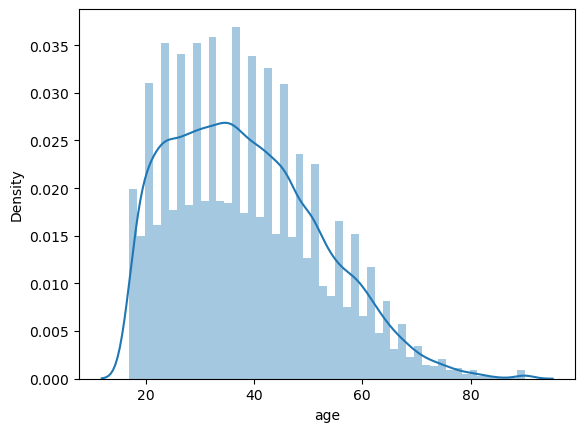

In [16]:
sns.distplot(df.age)

OBSERVATIONS : The data has right skewness, with majority of the ages falling in the 20–50. The count keeps on decreasing as the age increases.

### Workclass

In [17]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: xlabel='workclass'>

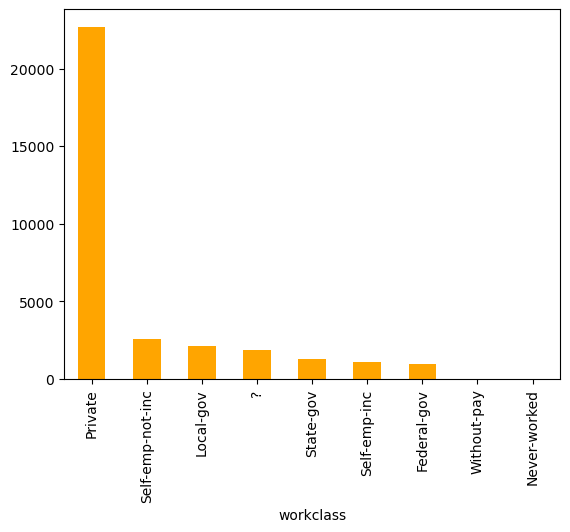

In [18]:
df['workclass'].value_counts().plot(kind='bar', color='orange')

OBSERVATIONS : Majority belong to the Private sector 

### Education

<Axes: xlabel='count', ylabel='education'>

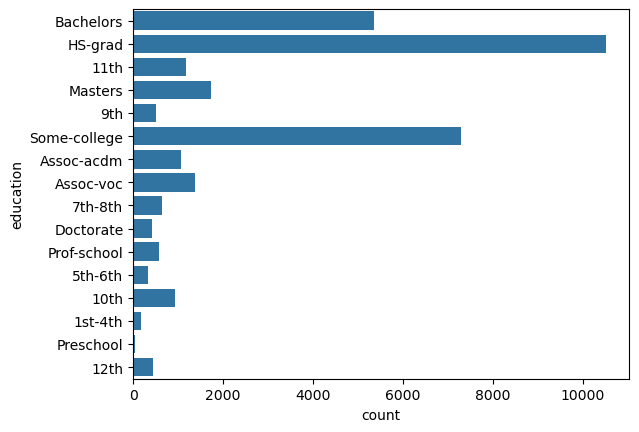

In [19]:
sns.countplot(df['education'])

OBSERVATIONS :  Majority have education level as ‘HS-grad’, followed by ‘Some-college’ and ‘Bachelors’.

### Martial-status

<Axes: xlabel='count', ylabel='marital-status'>

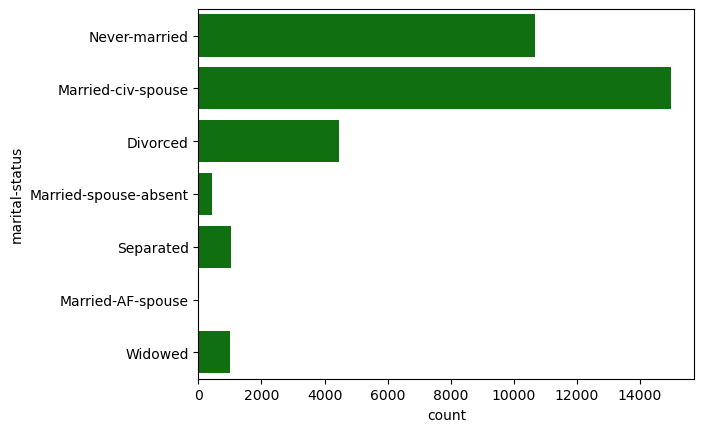

In [20]:
sns.countplot(df['marital-status'], color='green')

OBSERVATIONS : Majority have ‘Marital_Status’ as ‘Married-civ-spouse’, and least have ‘Married-AF-spouse’.
Count of ‘Never-married’ is also quite high.

### Relationship

<Axes: xlabel='count', ylabel='relationship'>

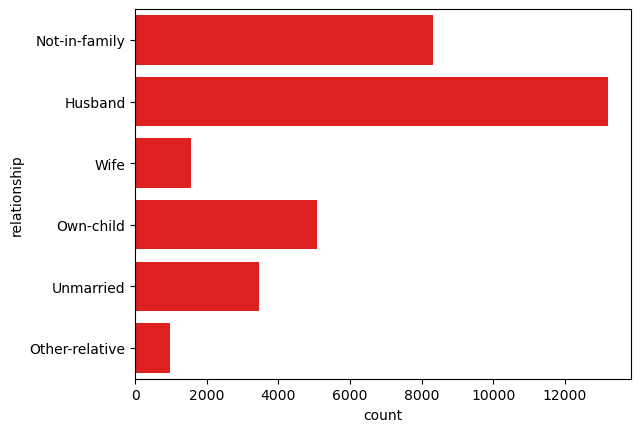

In [21]:
sns.countplot(df['relationship'], color='red')

OBSERVATIONS :

- The highest number is ‘Husband’ and lowest is ‘Other-relative’. 
- The column does not have any missing value.

### Occupation

<Axes: xlabel='count', ylabel='occupation'>

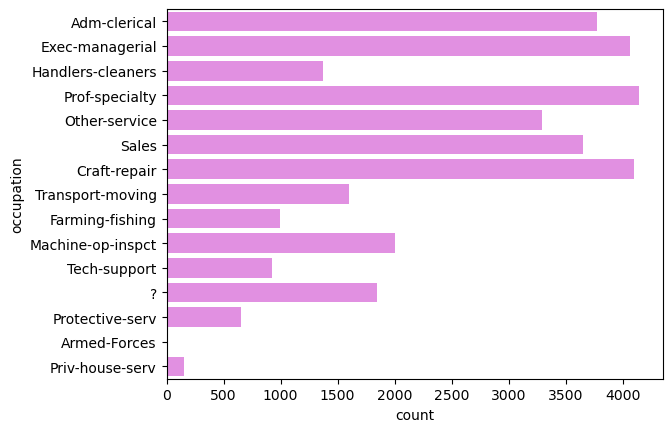

In [22]:
sns.countplot(df['occupation'], color='violet')

OBSERVATIONS :

- The occupation column contains 14 different categories, and have missing values represented by ‘?’.
- The count of missing values is slightly higher than ‘Workclass’ column — 1843.
- We observe that in case the ‘Workclass’ is ‘Never-worked’, then also the ‘Occupation’ is missing.

### Race

<Axes: xlabel='race'>

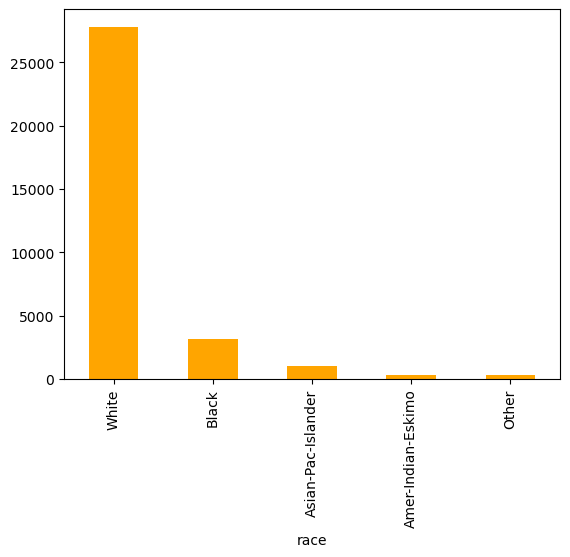

In [23]:
df['race'].value_counts().plot(kind='bar', color='orange')

### Sex

<Axes: xlabel='count', ylabel='sex'>

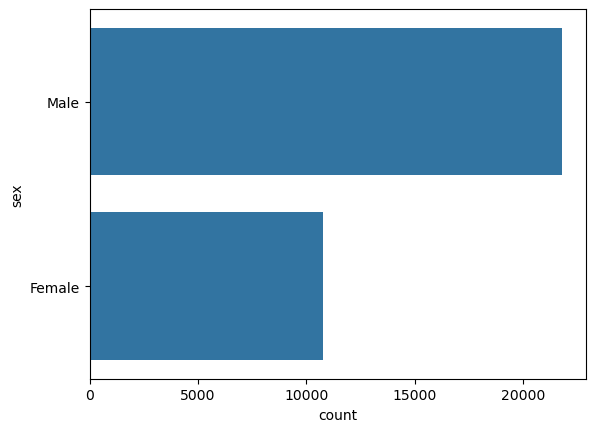

In [24]:
sns.countplot(df['sex'])

### Capital gain and loss

Text(0.5, 1.0, 'Capital Gain')

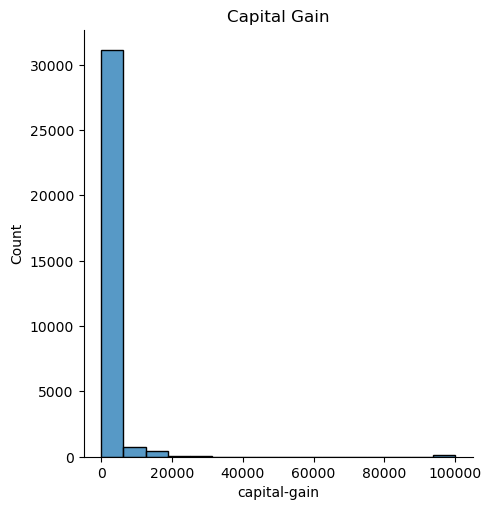

In [25]:
sns.displot(df['capital-gain'])
plt.title('Capital Gain')

Text(0.5, 1.0, 'Capital Loss')

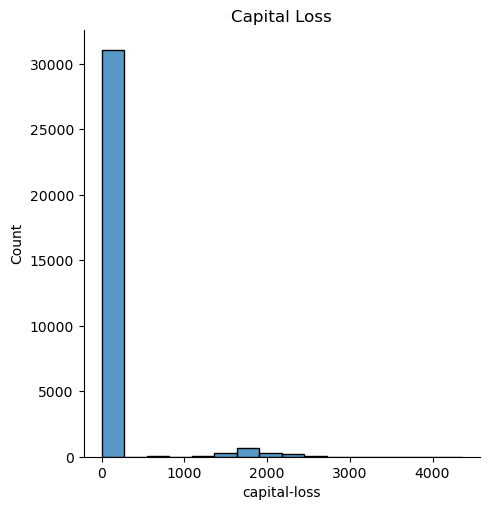

In [26]:
sns.displot(df['capital-loss'])
plt.title('Capital Loss')

OBSERVATIONS : The distribution plot for ‘aapital-gain’ and 'capital-loss' columns are highly right skewed and majority is set to '0'.

### Hours per week

/var/folders/3w/g76x3rkx2wbg5pzd1y_6wg000000gn/T/ipykernel_15515/1366286883.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week'])


<Axes: xlabel='hours-per-week', ylabel='Density'>

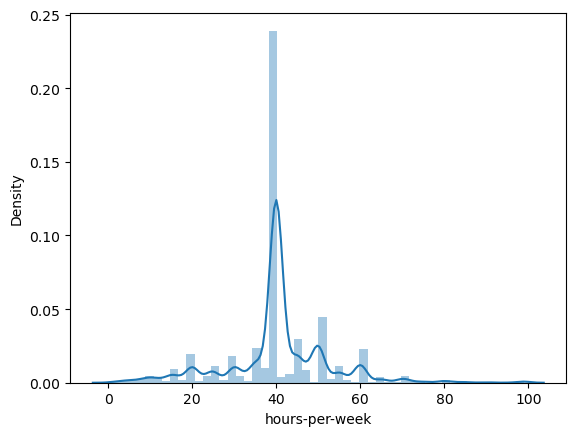

In [27]:
sns.distplot(df['hours-per-week'])

<Axes: xlabel='count', ylabel='native-country'>

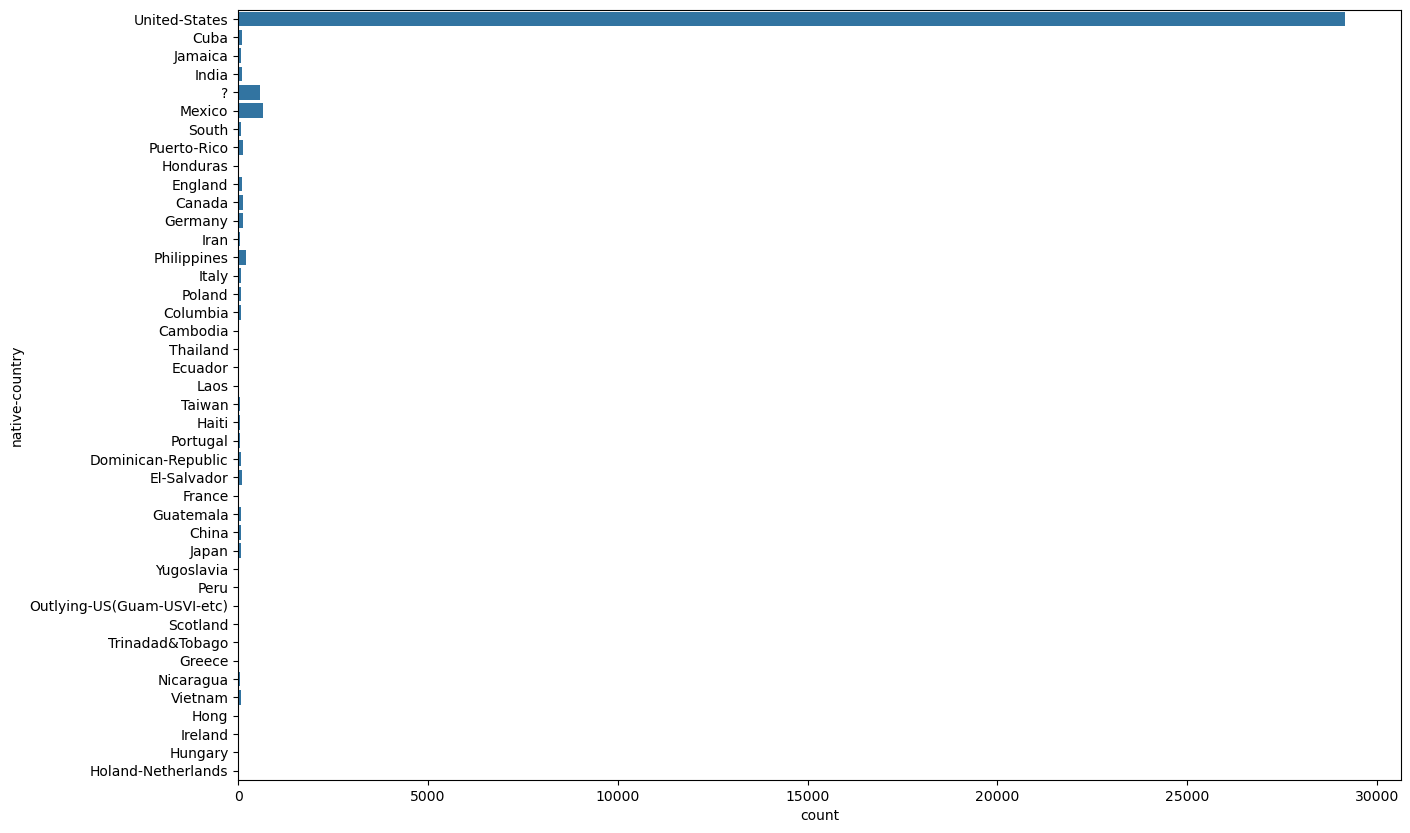

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(df['native-country'])

OBSERVATIONS : There are 583 missing values in this column which hve to be treated

# Impact on Income

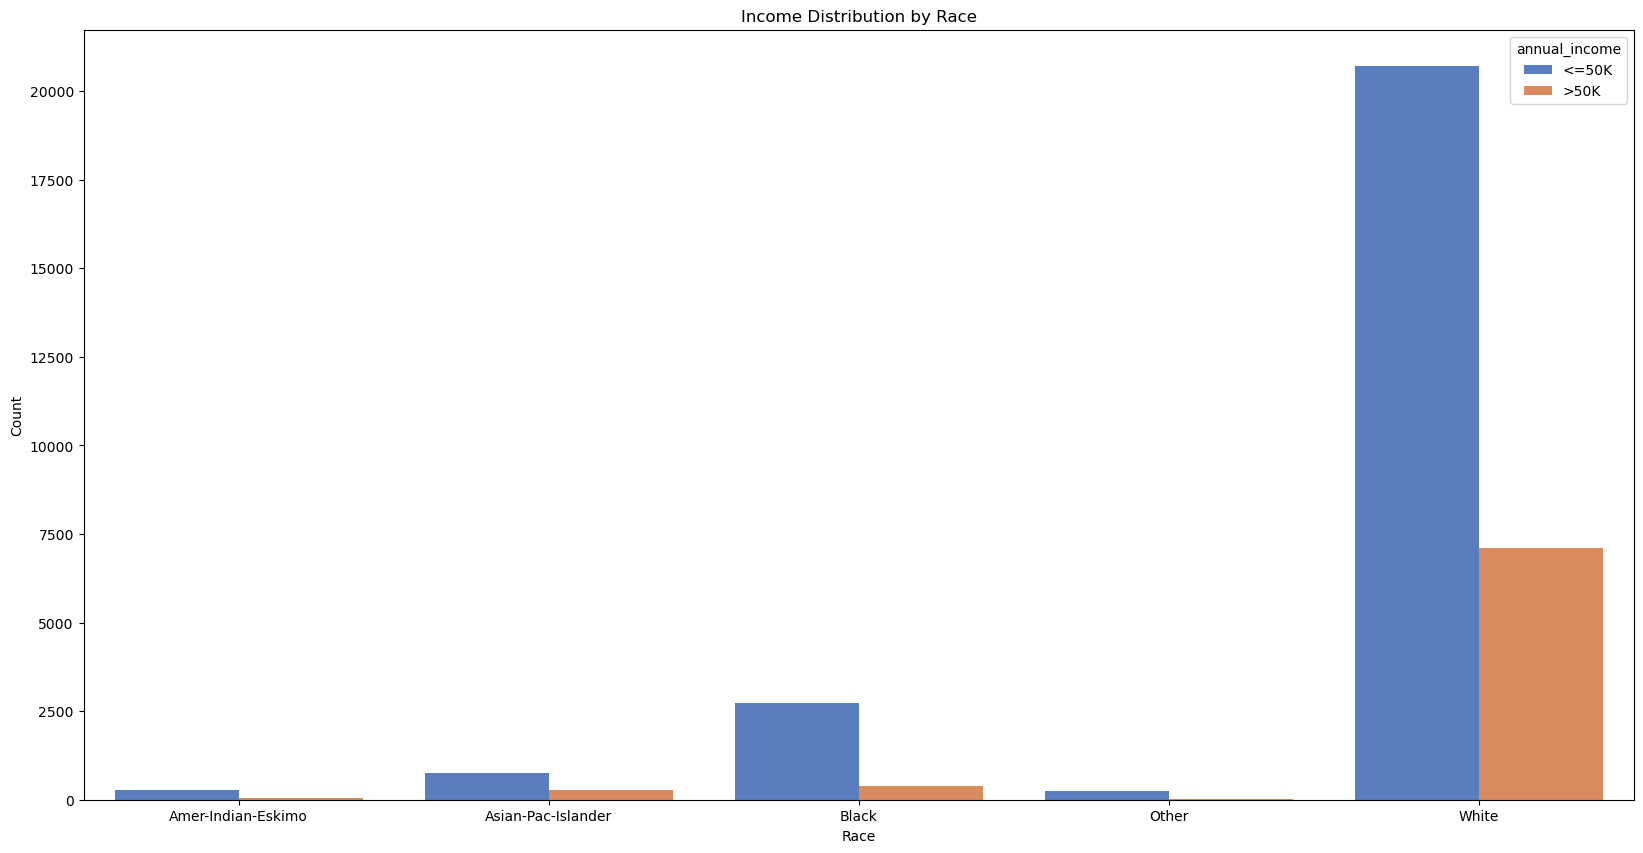

In [29]:
grouped_data = df.groupby(['race', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='race', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.show()

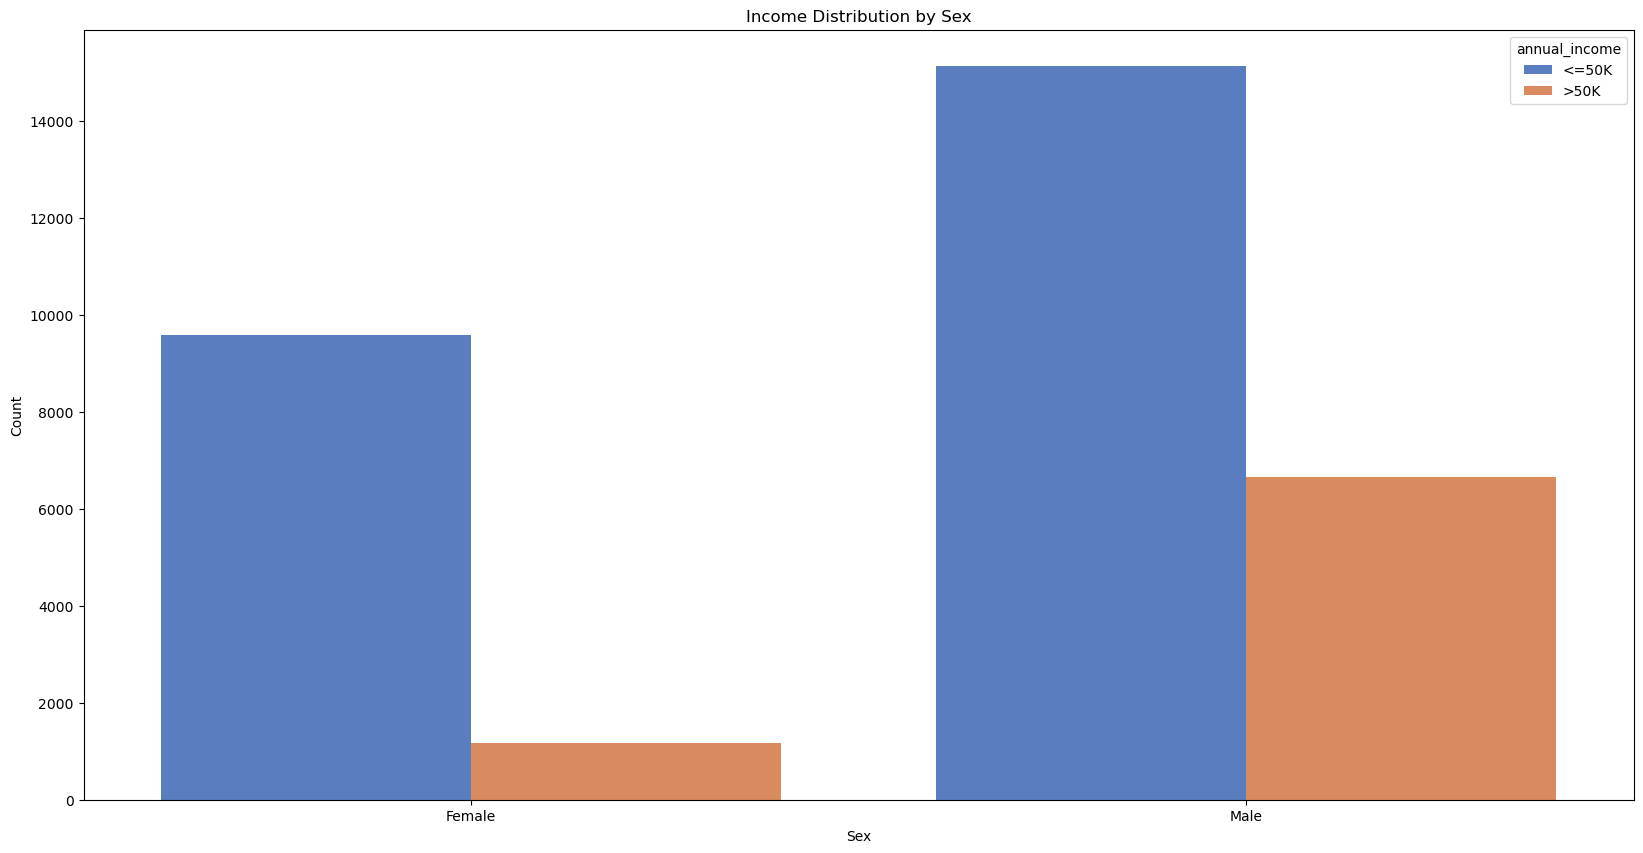

In [30]:
grouped_data = df.groupby(['sex', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='sex', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Sex')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

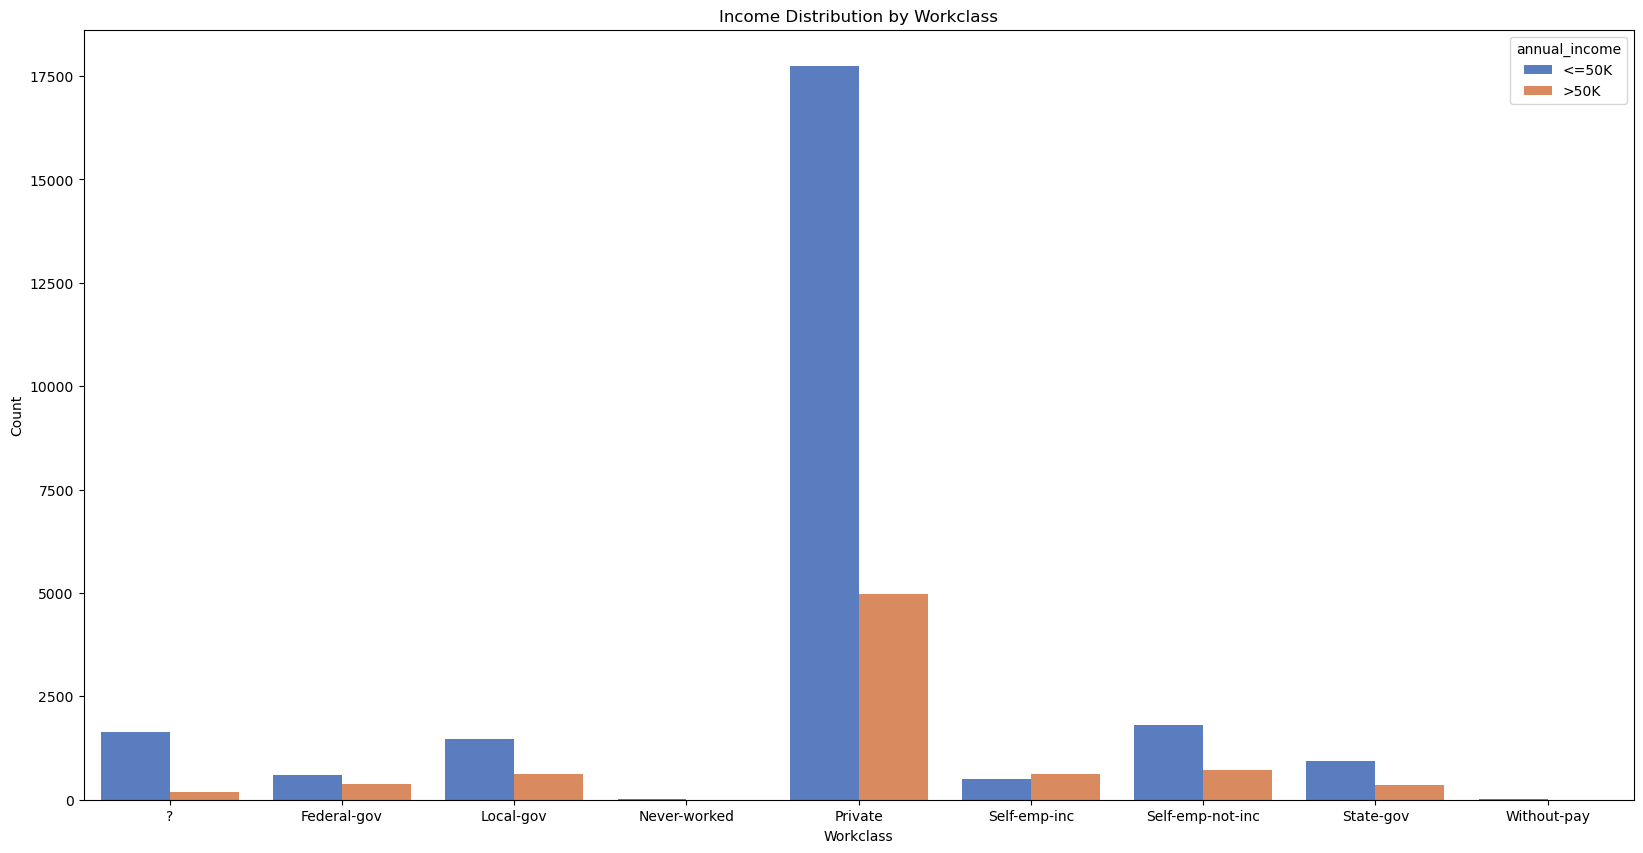

In [31]:
grouped_data = df.groupby(['workclass', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='workclass', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Workclass')
plt.ylabel('Count')
plt.xlabel('Workclass')
plt.show()

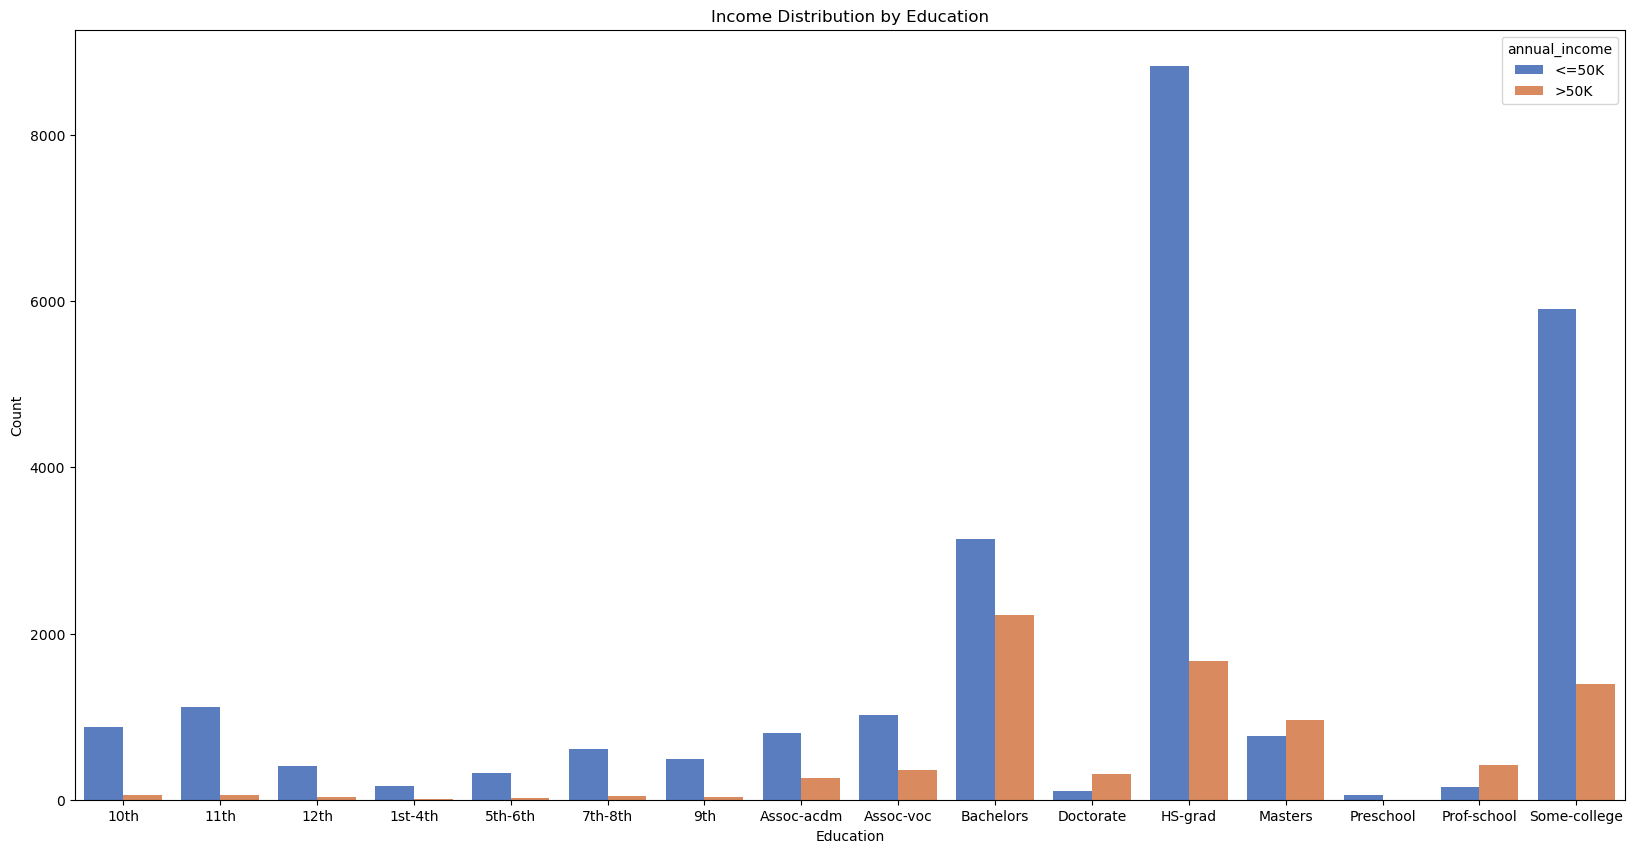

In [32]:
grouped_data = df.groupby(['education', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='education', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Education')
plt.ylabel('Count')
plt.xlabel('Education')
plt.show()

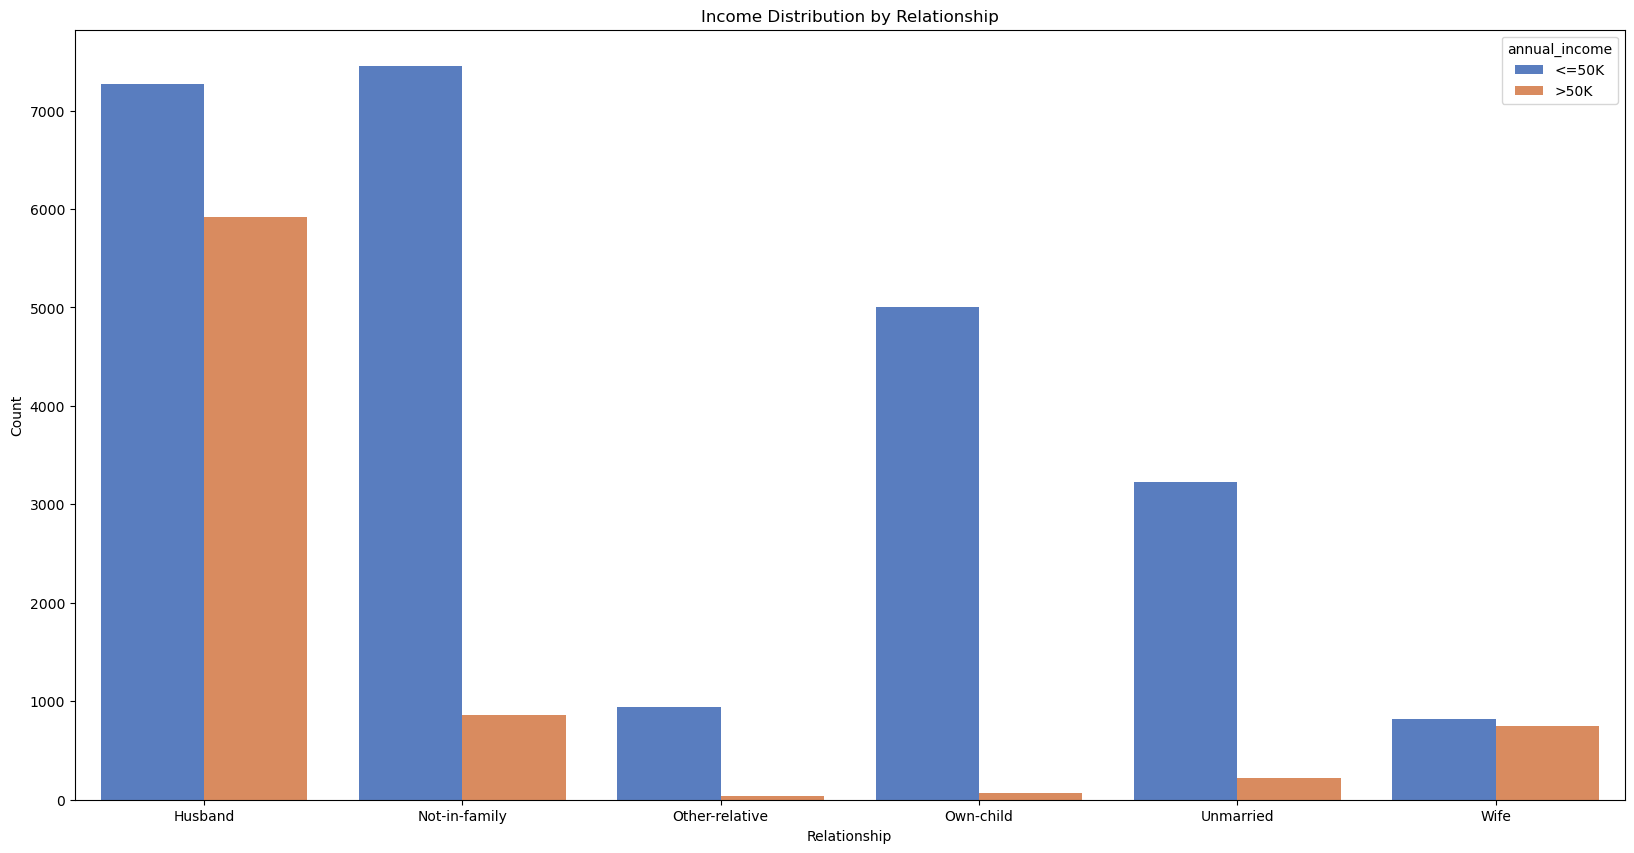

In [33]:
grouped_data = df.groupby(['relationship', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=grouped_data, x='relationship', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Relationship')
plt.ylabel('Count')
plt.xlabel('Relationship')
plt.show()

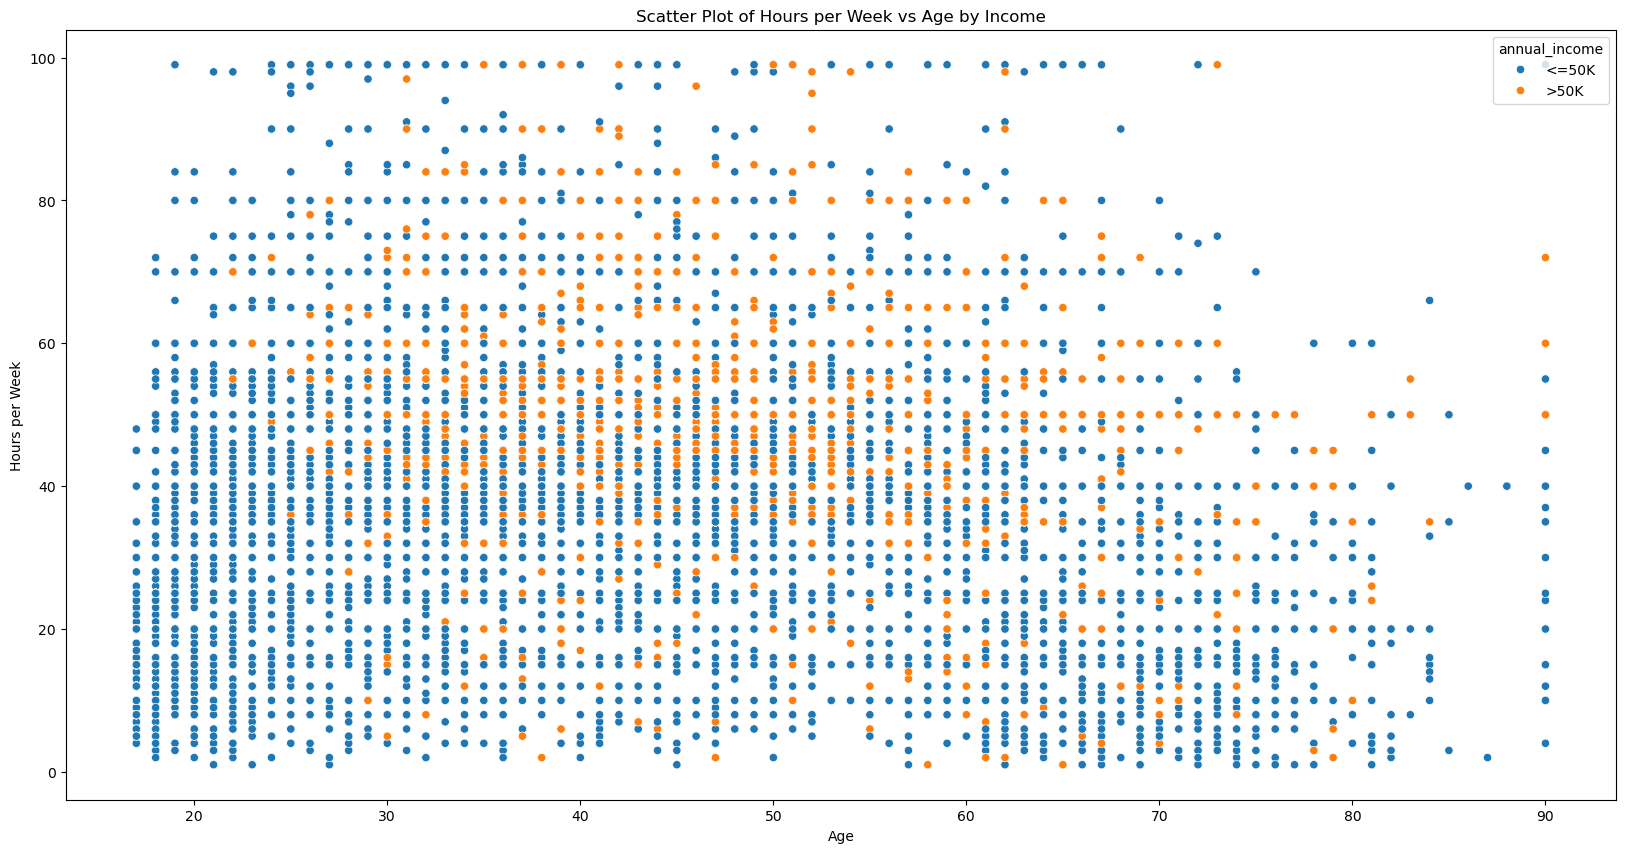

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='annual_income')
plt.title('Scatter Plot of Hours per Week vs Age by Income')
plt.ylabel('Hours per Week')
plt.xlabel('Age')
plt.show()

<Axes: >

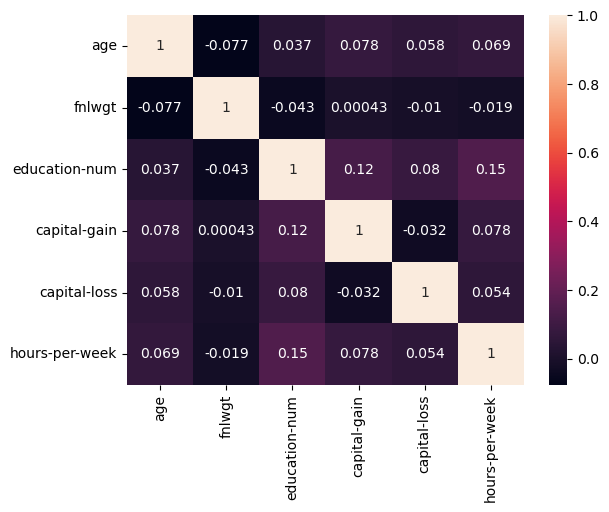

In [35]:
grouped_data = df.drop(columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','annual_income'])
sns.heatmap(grouped_data.corr(), annot=True)

OBSERVATIONS :

- A person has high chance of earning >50K in case his/her race is ‘White’/’Asian-pac-islander’.
- Males have a higher chance of earning more than 50K, than females.
- Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.
- People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning, than <=50K. Bachelors degree also has     around 10:7 ratio of <=50K : >50K.
- If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.
- From the scatterplot between age, hours_per_week and income, we observe that a person needs to be >30 to be earning more than 50K, else      needs to work at least 60 hours_per_week to earn >50K.

# Cleaning data

In [36]:
# Replacing '?' with the most common value type for each field to predict most accurate results
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','Prof-specialty')
df['native-country'] = df['native-country'].replace('?','United-States')

### Combining columns to reduce categories and increase logic

In [37]:
# workclass

category_mapping = {
    'Never-worked': 'Without-pay',  # Combine 'Never-worked' and 'Without-pay'
    'State-gov': 'Gov',            # Reclassify 'State-gov' and 'Local-gov' as 'Gov'
    'Local-gov': 'Gov',
    'Self-emp-not-inc': 'Private',  # Combine 'Self-emp-not-inc' and 'Private'
}

# Apply the mapping to the column
df['workclass'] = df['workclass'].replace(category_mapping)

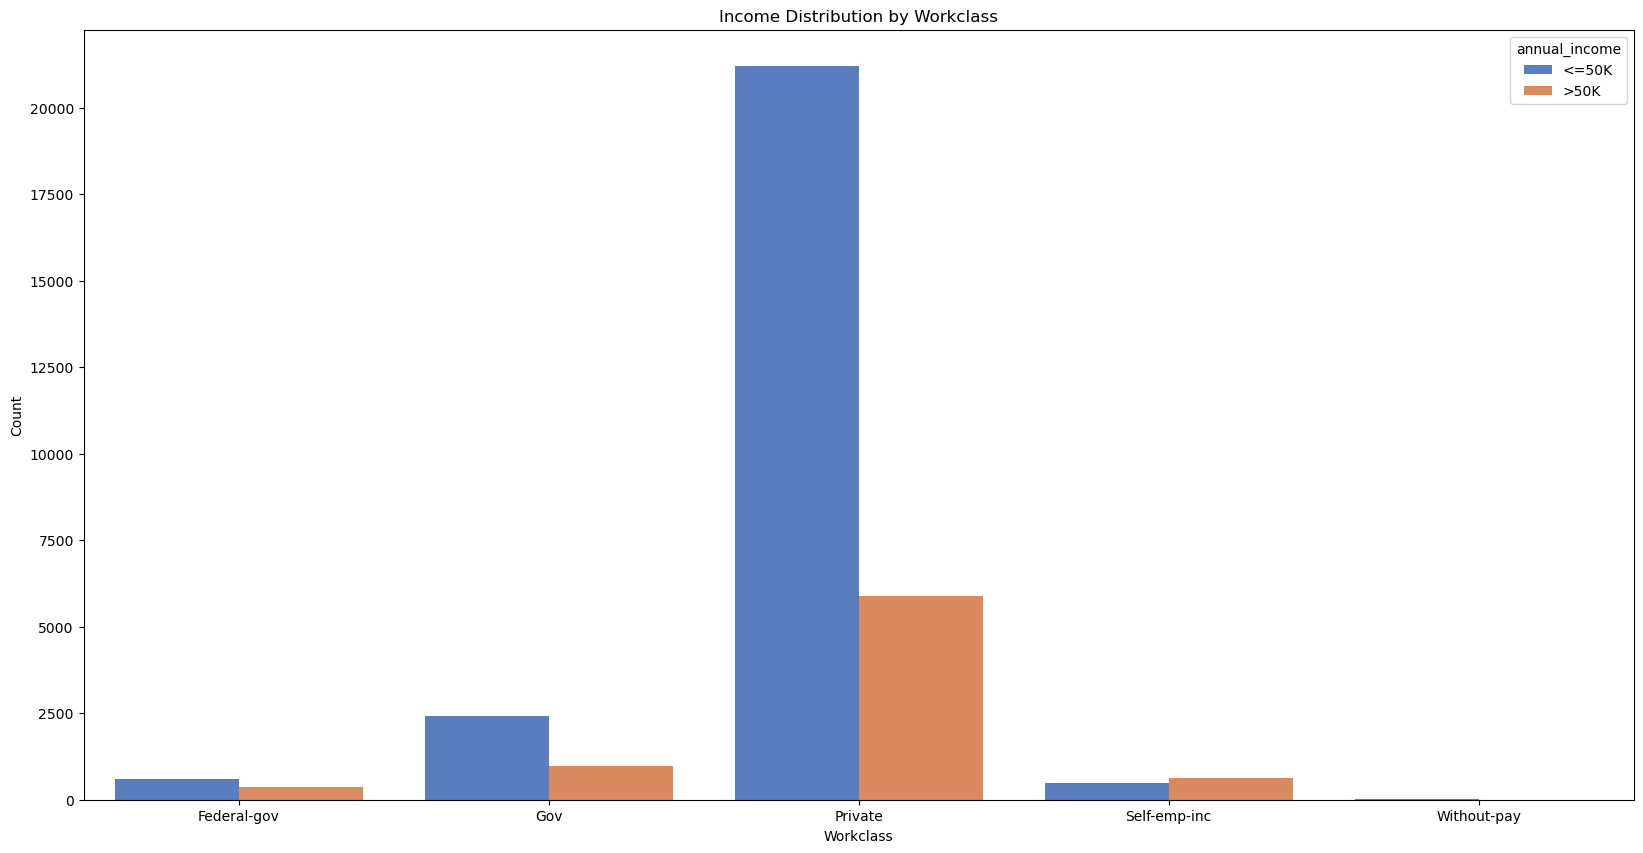

In [38]:
# New Workclass field
new_grouped_data = df.groupby(['workclass', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=new_grouped_data, x='workclass', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Workclass')
plt.ylabel('Count')
plt.xlabel('Workclass')
plt.show()

In [39]:
# Education

category_mapping = {
    '10th': 'School',
    '11th': 'School',
    '12th': 'School',
    '1st-4th': 'School',
    '5th-6th': 'School',
    '7th-8th': 'School',
    '9th': 'School',
    'Preschool': 'School',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Doctorate',
    'Assoc-acdm': 'Assoc',
    'Assoc-voc': 'Assoc',
    'HS-grad': 'College',
    'Some-college': 'College',
}

df['education'] = df['education'].replace(category_mapping)

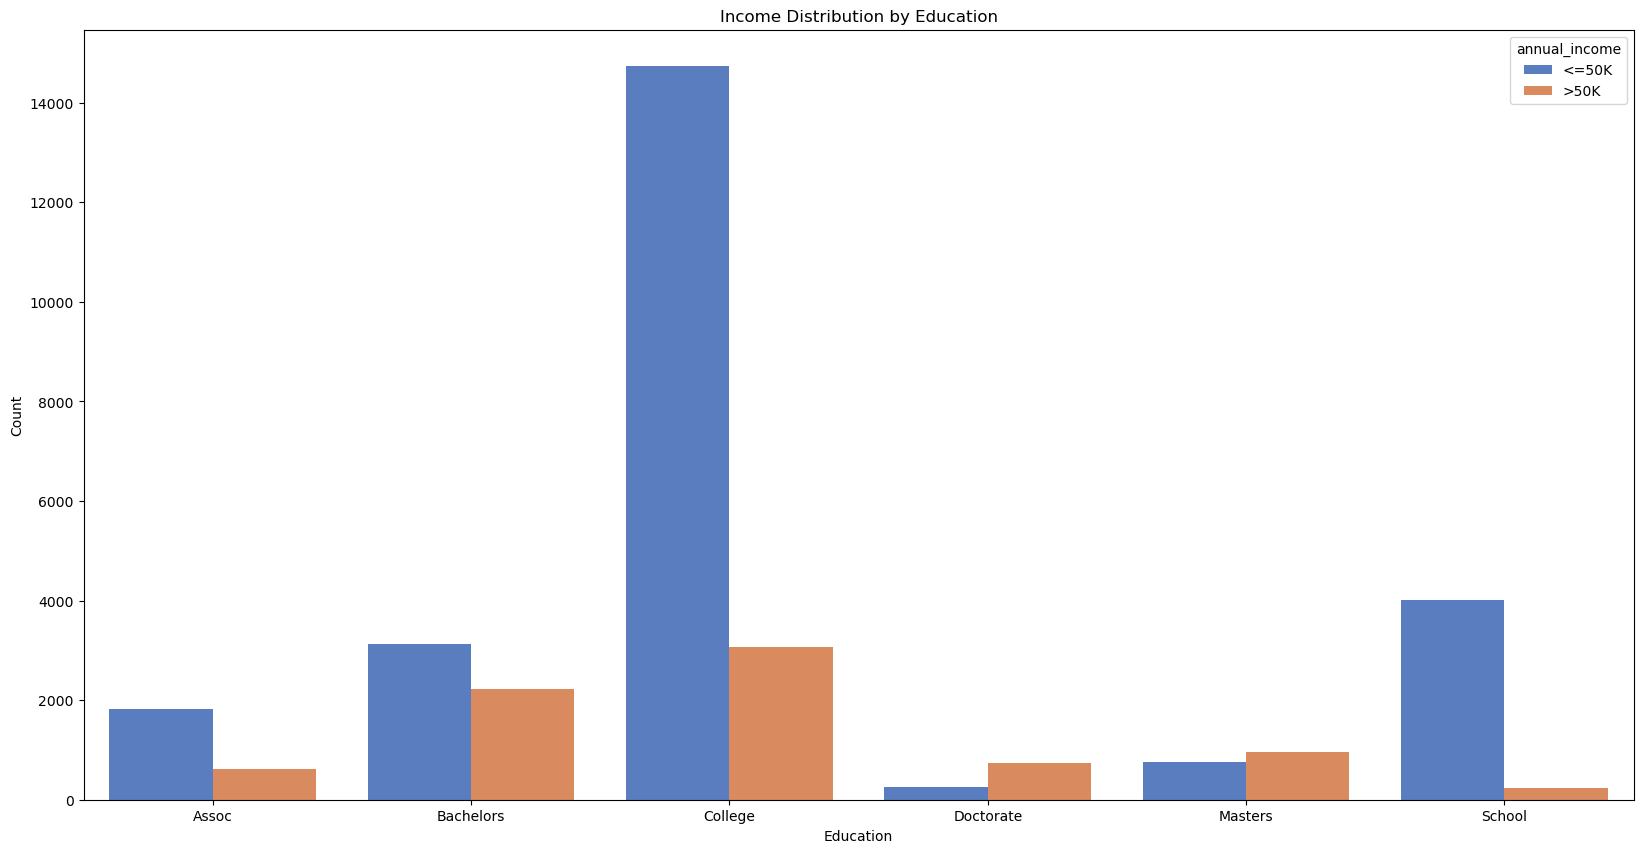

In [40]:
# New Education field
new_grouped_data = df.groupby(['education', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=new_grouped_data, x='education', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by Education')
plt.ylabel('Count')
plt.xlabel('Education')
plt.show()

In [41]:
# Marital-status

category_mapping={
    'Divorced': 'No spouse',
    'Married-spouse-absent': 'No spouse',
    'Separated': 'No spouse',
    'Widowed': 'No spouse',
    'Married-AF-spouse': 'No spouse',
}

df['marital-status'] = df['marital-status'].replace(category_mapping)

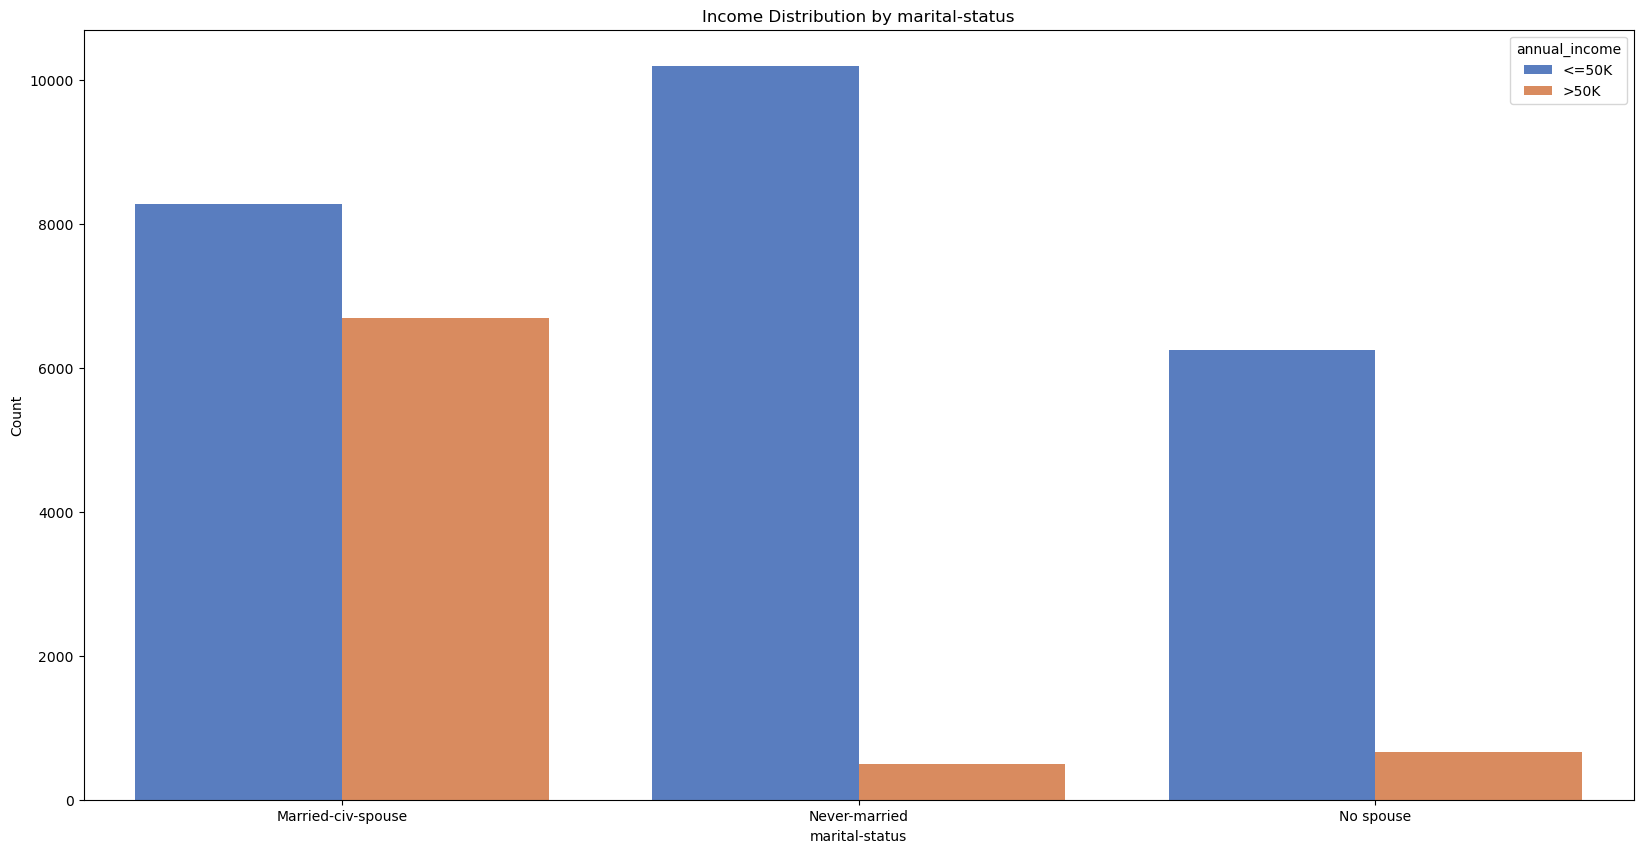

In [42]:
# New marital-status field
new_grouped_data = df.groupby(['marital-status', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=new_grouped_data, x='marital-status', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by marital-status')
plt.ylabel('Count')
plt.xlabel('marital-status')
plt.show()

In [43]:
# Relationship

category_mapping={
    'Not-in-family': 'Other',
    'Own-child': 'Other',
    'Unmarried': 'Other',
    'Other-relative': 'Other',
}

df['relationship'] = df['relationship'].replace(category_mapping)

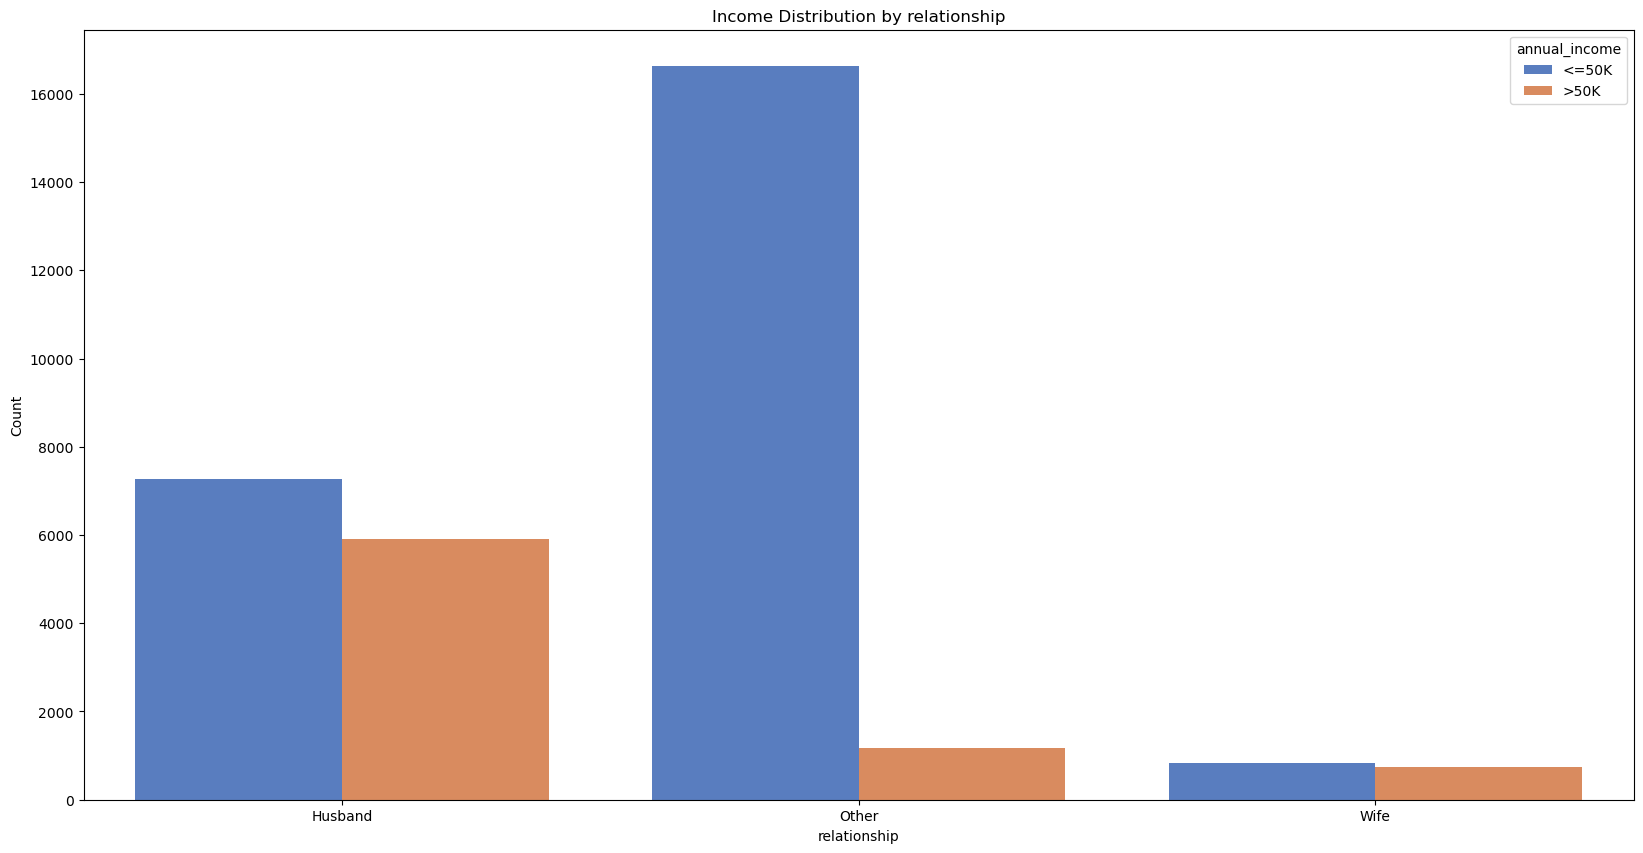

In [44]:
# New relationship field
new_grouped_data = df.groupby(['relationship', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=new_grouped_data, x='relationship', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by relationship')
plt.ylabel('Count')
plt.xlabel('relationship')
plt.show()

In [45]:
# Race
category_mapping={
    'Amer-Indian-Eskimo': 'Other',
    'Other': 'Other',
}

df['race'] = df['race'].replace(category_mapping)

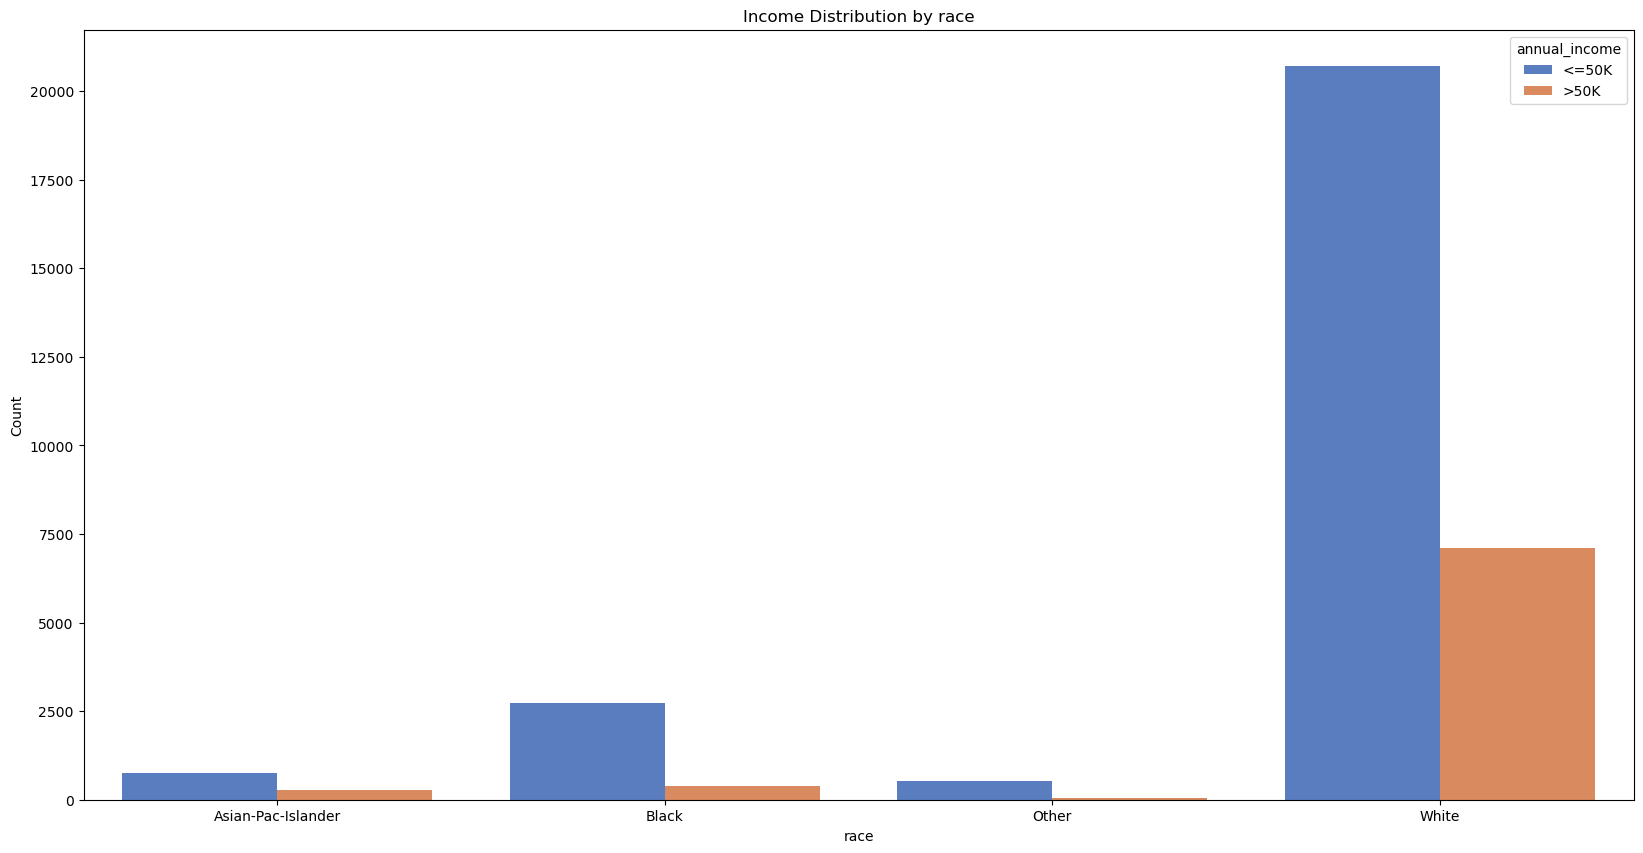

In [46]:
# New race field
new_grouped_data = df.groupby(['race', 'annual_income']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(data=new_grouped_data, x='race', y='count', hue='annual_income', palette='muted')
plt.title('Income Distribution by race')
plt.ylabel('Count')
plt.xlabel('race')
plt.show()

### Outlier detection

Text(0.5, 1.0, 'annual_income')

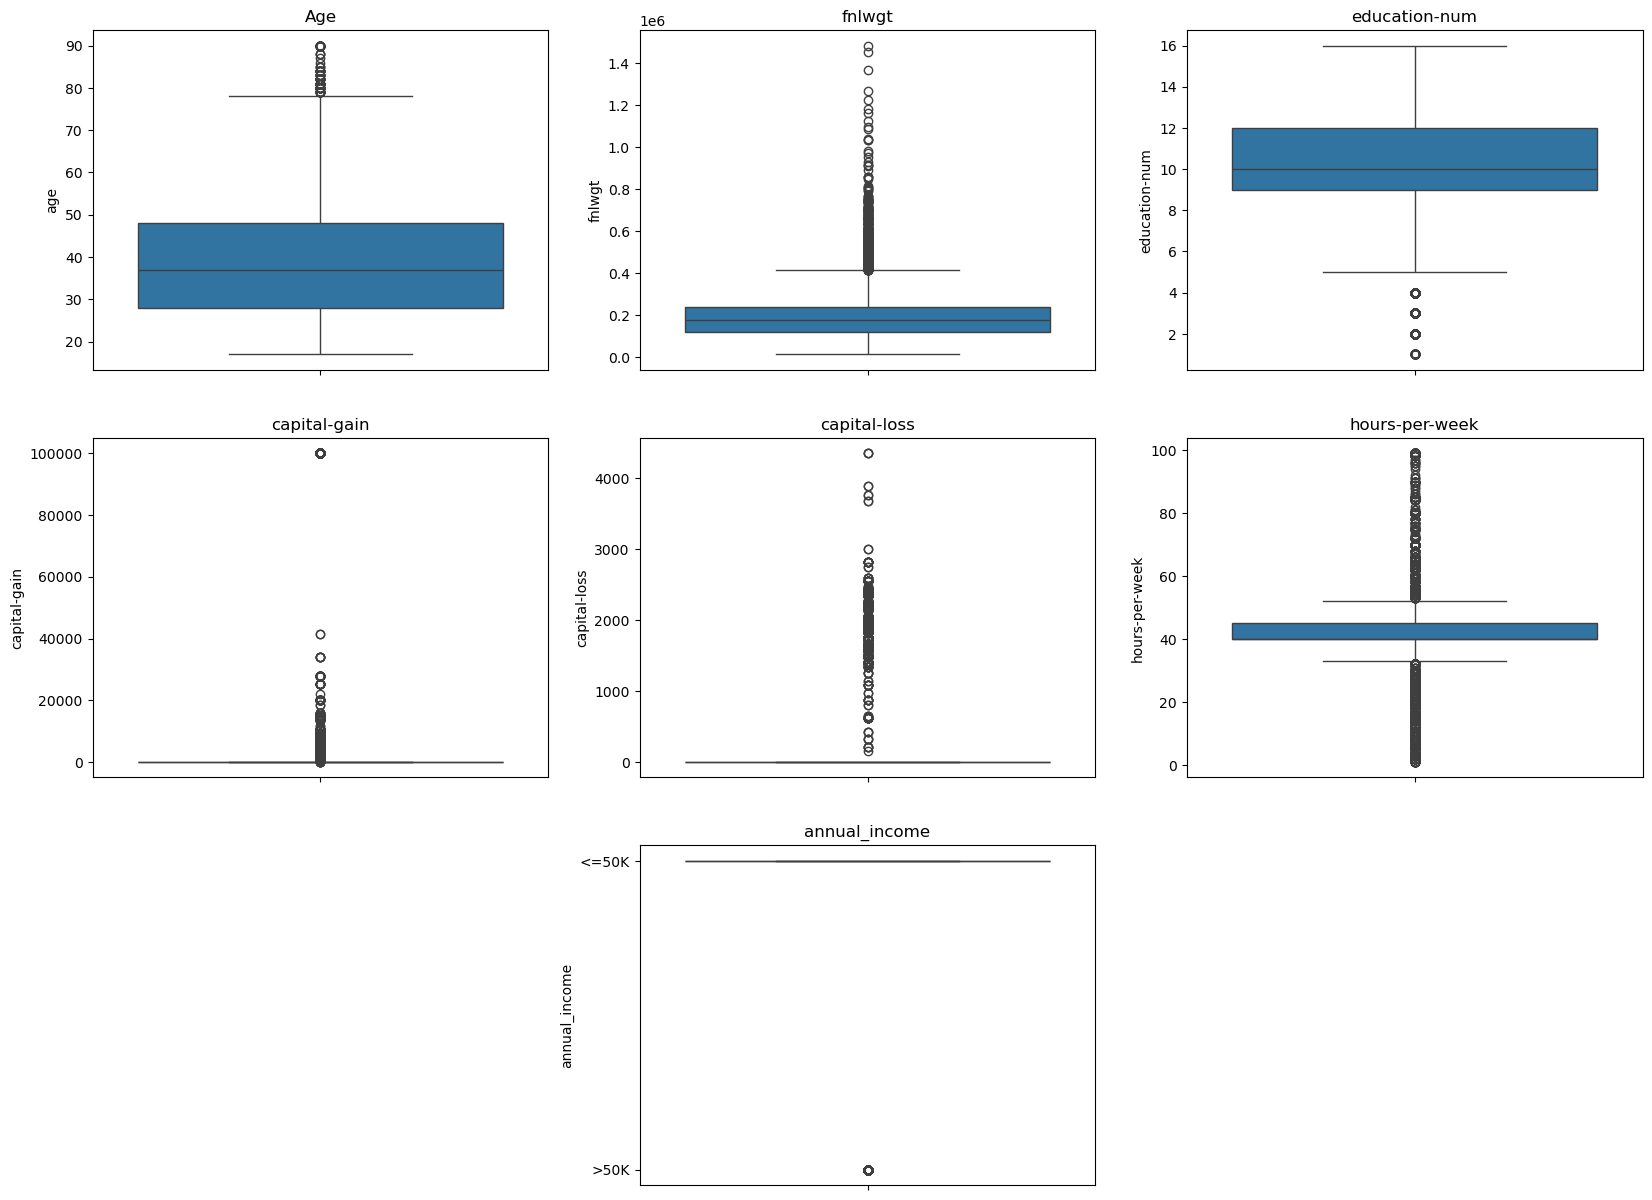

In [47]:
plt.figure(figsize=(20,15))

# age
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title('Age')

# fnlwgt
plt.subplot(3,3,2)
sns.boxplot(df['fnlwgt'])
plt.title('fnlwgt')

# education_num
plt.subplot(3,3,3)
sns.boxplot(df['education-num'])
plt.title('education-num')

# capital_gain
plt.subplot(3,3,4)
sns.boxplot(df['capital-gain'])
plt.title('capital-gain')

# capital_loss
plt.subplot(3,3,5)
sns.boxplot(df['capital-loss'])
plt.title('capital-loss')

# hours-per-week
plt.subplot(3,3,6)
sns.boxplot(df['hours-per-week'])
plt.title('hours-per-week')

# annual_income
plt.subplot(3,3,8)
sns.boxplot(df['annual_income'])
plt.title('annual_income')

### z scores

In [48]:
# Calculate z-scores for all numerical columns
df_z_scores = df.select_dtypes(include='number').apply(zscore)

# Merging z-scores back to the original DataFrame:
df_z = pd.concat([df, df_z_scores.add_suffix('_z')], axis=1)

In [49]:
df_z_field_based = pd.DataFrame(df_z[['age','age_z']])
df_z_field_based

,age,age_z
0,39,0.030671
1,50,0.837109
2,38,-0.042642
3,53,1.057047
4,28,-0.775768
...,...,...
32556,27,-0.849080
32557,40,0.103983
32558,58,1.423610
32559,22,-1.215643


In [50]:
df_z.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,annual_income,age_z,fnlwgt_z,education-num_z,capital-gain_z,capital-loss_z,hours-per-week_z
0,39,Gov,77516,Bachelors,13,Never-married,Adm-clerical,Other,White,Male,...,0,40,United-States,<=50K,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,50,Private,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,38,Private,215646,College,9,No spouse,Handlers-cleaners,Other,White,Male,...,0,40,United-States,<=50K,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,-0.115955,0.898201,1.523438,-0.145920,-0.21666,-0.035429
6,49,Private,160187,School,5,No spouse,Other-service,Other,Black,Female,...,0,16,Jamaica,<=50K,0.763796,-0.280358,-1.974858,-0.145920,-0.21666,-1.979184
7,52,Private,209642,College,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,45,United-States,>50K,0.983734,0.188195,-0.420060,-0.145920,-0.21666,0.369519
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Other,White,Female,...,0,50,United-States,>50K,-0.555830,-1.364279,1.523438,1.761142,-0.21666,0.774468
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,40,United-States,>50K,0.250608,-0.287350,1.134739,0.555214,-0.21666,-0.035429


In [51]:
df_z.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_z,fnlwgt_z,education-num_z,capital-gain_z,capital-loss_z,hours-per-week_z
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


OBSERVATIONS:

After calculating the number of rows containing outliers, we find that we would lose large data values if we remove the outliers. 

Since our dataset is already imbalanced, losing this number of rows with further increase the imbalance, and would be a significant loss if we consider the rows with income higher than 50K$.

Hence we continue with the outliers and keep the rows

### Skewness treatment

In [52]:
# Raw skewness
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [53]:
# sqrt transformation for fngwlt
df['fnlwgt'] = np.sqrt(df['fnlwgt'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age                0.558743
fnlwgt             0.189115
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [54]:
# cbrt transformation for capital-gain and capital-loss
df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age               0.558743
fnlwgt            0.189115
education-num    -0.311676
capital-gain      4.099578
capital-loss      4.337076
hours-per-week    0.227643
dtype: float64

Since the values are still high for capital-gain and capital-loss, we will transform them again

In [55]:
# 2nd cbrt transformation for capital-gain and capital-loss
df['capital-gain'] = np.cbrt(df['capital-gain'])
df['capital-loss'] = np.cbrt(df['capital-loss'])
df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].skew()

age               0.558743
fnlwgt            0.189115
education-num    -0.311676
capital-gain      3.102517
capital-loss      4.304769
hours-per-week    0.227643
dtype: float64

Since the skewness does not further get reduced, we continue with this data

# Pre-Processing

### Encoding data

Since these ML models require int/float values, we encode the categorical columns

In [56]:
le = LabelEncoder()

In [57]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [58]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['native-country'] = le.fit_transform(df['native-country'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['annual_income'] = le.fit_transform(df['annual_income'])

In [59]:
# Final dataset
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,1,278.416954,1,13,1,0,1,3,1,2.348587,0.0,40,38,0
1,50,2,288.636450,1,13,0,3,0,3,1,0.000000,0.0,13,38,0
2,38,2,464.377002,2,9,2,5,1,3,1,0.000000,0.0,40,38,0
3,53,2,484.480134,5,7,0,5,0,1,1,0.000000,0.0,40,38,0
4,28,2,581.729318,1,13,0,9,2,1,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,507.249446,0,12,0,12,2,3,0,0.000000,0.0,38,38,0
32557,40,2,392.904569,2,9,0,6,0,3,1,0.000000,0.0,40,38,1
32558,58,2,389.756334,2,9,2,0,1,3,0,0.000000,0.0,40,38,0
32559,22,2,448.876375,2,9,1,0,1,3,1,0.000000,0.0,20,38,0


### Scaling the data

Bringing the data to a common scale allow the model to learn better, since there are certain columns with very small values and some columns with high values.

In [60]:
sc = StandardScaler()

In [61]:
# Dividing dataset into Independent and Dependent data before scaling
ds_x = df.drop('annual_income', axis='columns')
y = df['annual_income']

In [62]:
dataset = sc.fit_transform(ds_x)

In [63]:
X = pd.DataFrame(dataset, columns=ds_x.columns)

In [64]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,-1.771097,-1.173869,-0.894979,1.134739,0.317378,-1.545256,0.625423,0.395868,0.703071,2.846616,-0.221124,-0.035429,0.26137
1,0.837109,0.258919,-1.088463,-0.894979,1.134739,-0.962549,-0.790092,-1.126353,0.395868,0.703071,-0.299187,-0.221124,-2.222153,0.26137
2,-0.042642,0.258919,0.380227,-0.157259,-0.420060,1.597304,-0.286649,0.625423,0.395868,0.703071,-0.299187,-0.221124,-0.035429,0.26137
3,1.057047,0.258919,0.548231,2.055901,-1.197459,-0.962549,-0.286649,-1.126353,-2.195842,0.703071,-0.299187,-0.221124,-0.035429,0.26137
4,-0.775768,0.258919,1.360957,-0.894979,1.134739,-0.962549,0.720237,2.377199,-2.195842,-1.422331,-0.299187,-0.221124,-0.035429,-5.35294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.258919,0.738518,-1.632699,0.746039,-0.962549,1.475401,2.377199,0.395868,-1.422331,-0.299187,-0.221124,-0.197409,0.26137
32557,0.103983,0.258919,-0.217079,-0.157259,-0.420060,-0.962549,-0.034928,-1.126353,0.395868,0.703071,-0.299187,-0.221124,-0.035429,0.26137
32558,1.423610,0.258919,-0.243389,-0.157259,-0.420060,1.597304,-1.545256,0.625423,0.395868,-1.422331,-0.299187,-0.221124,-0.035429,0.26137
32559,-1.215643,0.258919,0.250685,-0.157259,-0.420060,0.317378,-1.545256,0.625423,0.395868,0.703071,-0.299187,-0.221124,-1.655225,0.26137


### Splitting data into train and test sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [66]:
print(X_train.shape)
print(X_test.shape)

(22792, 14)
(9769, 14)


In [67]:
print(y_train.shape)
print(y_test.shape)

(22792,)
(9769,)


# Logistic Regression

In [68]:
# Initializing LogReg Model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = LogReg.predict(X_test)

In [70]:
y_pred_tabular = pd.DataFrame(y_pred)
y_pred_tabular

,0
0,0
1,0
2,0
3,0
4,0
...,...
9764,1
9765,1
9766,1
9767,0


# Random Forest

In [71]:
# Initializing the RF model
Classifier = RandomForestClassifier()
Classifier.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Classifier predictions
y_pred_classifier = Classifier.predict(X_test)
y_pred_classifier

array([0, 0, 0, ..., 1, 0, 0])

# Results

### Logistic Regression

In [73]:
# Accuracy Score
print('Accuracy:', (LogReg.score(X_test, y_test)))

Accuracy: 0.8330433002354386


In [74]:
# Confusion Matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[6868  539]
 [1092 1270]]


In [75]:
# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.93


In [76]:
# Precision - False
precision_false = tn / (tn + fn)
print(f"Precision (when target is False): {precision_false:.2f}")

Precision (when target is False): 0.86


In [77]:
# Total Support
total_sup = tn+fp+fn+tp
total_sup

9769

In [78]:
# f1 score
f1 = f1_score(y_test, y_pred, pos_label=1)
f1

0.6089666746583553

In [79]:
# ROC score
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,-1])

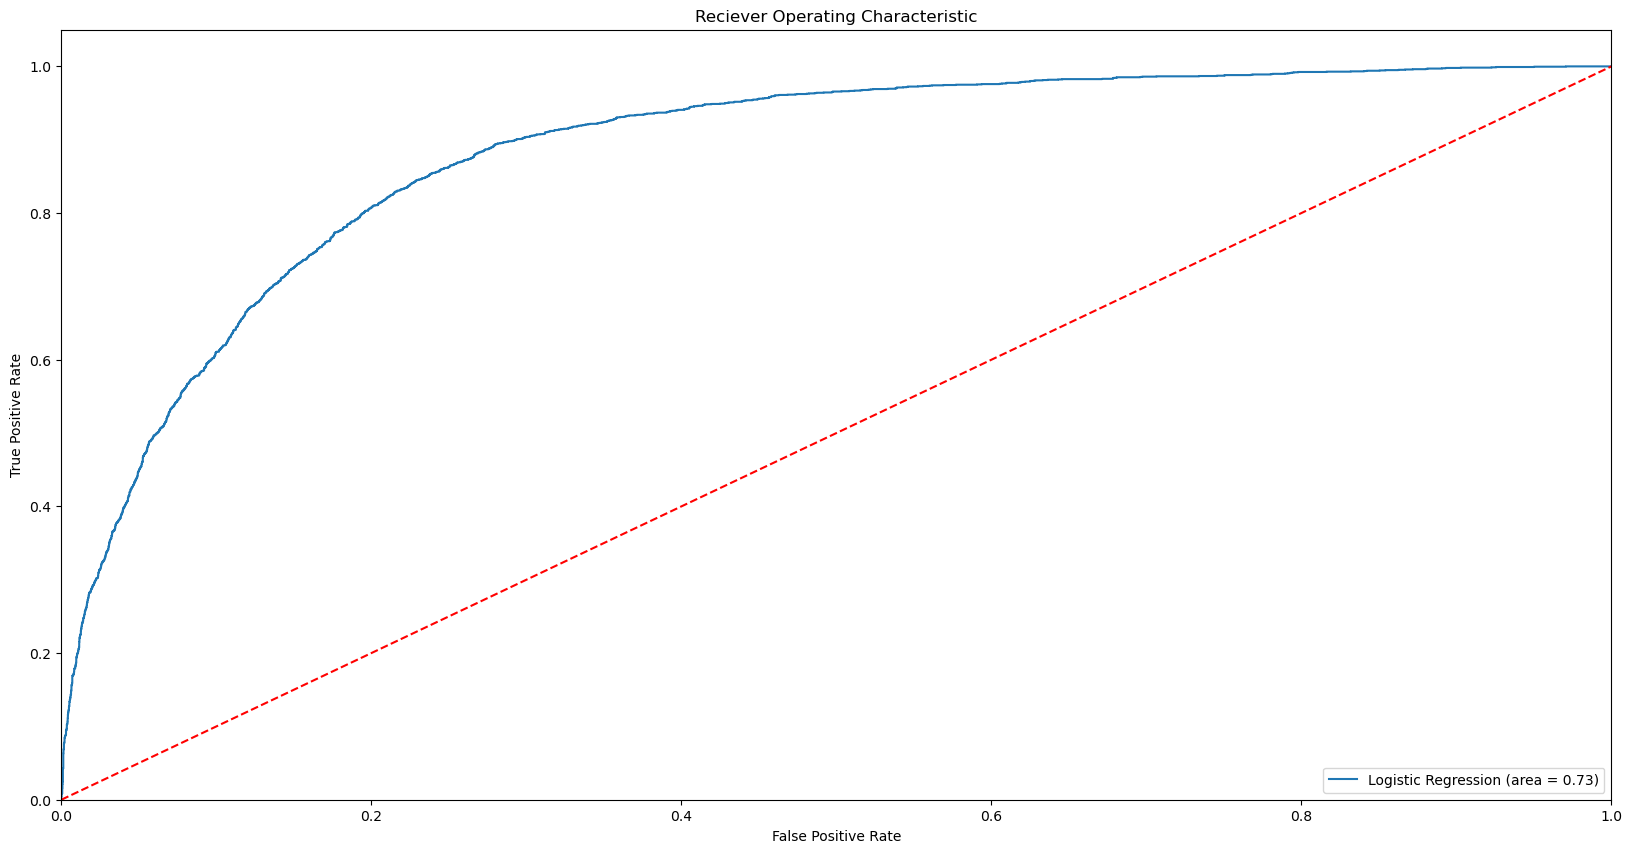

In [80]:
plt.figure(figsize=(20,10))

plt.title('Reciever Operating Characteristic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0, 1.0])  # Set limits for the x-axis
plt.ylim([0.0, 1.05])  # Set limits for the y-axis

    # Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)  
    # Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'r--')  

plt.legend(loc='lower right')

# plt.savefig('Log_ROC')

plt.show()

The area under the ROC curve to the red line shows the accurately predicted data

OBSERVATIONS : The curve depicts that the model is good.

### Random Forest

In [81]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_classifier)
print("Accuracy:", accuracy)

Accuracy: 0.8540280479066434


In [82]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classifier))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7407
           1       0.73      0.63      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

